# TF tutrial with Theano

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
# Load MNIST Data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [31]:
import numpy as np
import theano.tensor as T
import theano 

In [32]:
x = T.dmatrix('x') # shape=[None, 784]
y_ = T.dmatrix('y_') # gt labels shape=[None, 10] #one-hot 10-dimensional vector indicating digit class


In [33]:
W = theano.shared(np.zeros([784,10]))
b = theano.shared(np.zeros([10,]))

In [34]:
#y = tf.nn.softmax(tf.matmul(x,W) + b)
y = T.nnet.softmax(theano.dot(x,W) + b)

In [35]:
print W.get_value().shape

(784, 10)


In [36]:
cross_entropy = T.mean(-T.sum(y_*T.log(y),1))

In [37]:
#f = theano.function([x, y_], cross_entropy)
#f(np.ones([2,784]), np.ones([2,10]))
#f(x_in, gt_in)
#f = theano.function([x], y)
#f(x_in)

In [38]:
gw, gb = T.grad(cross_entropy, [W, b]) 


In [39]:
#train = theano.function([x, y_], None, updates=[(W,W-0.1*gw), (b, b-0.1*gb)])
train = theano.function([x, y_], cross_entropy, updates=[(W,W-0.1*gw), (b, b-0.1*gb)])


In [40]:
batch = mnist.train.next_batch(50)
x_in = np.asarray(batch[0])
gt_in = np.asarray(batch[1])


In [41]:
theano.printing.debugprint(y)

Softmax [id A] ''   
 |Elemwise{add,no_inplace} [id B] ''   
   |dot [id C] ''   
   | |x [id D]
   | |<TensorType(float64, matrix)> [id E]
   |DimShuffle{x,0} [id F] ''   
     |<TensorType(float64, vector)> [id G]


In [42]:
err = []
for i in range(1000):
    batch = mnist.train.next_batch(50)
    x_in = np.asarray(batch[0])
    gt_in = np.asarray(batch[1])
    err += [train(x_in, gt_in)]
    #x: batch[0], y_: batch[1]

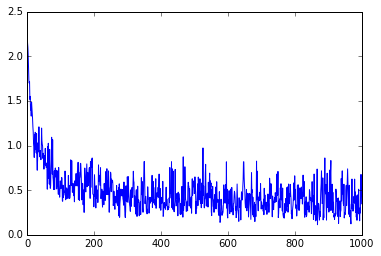

In [43]:
plt.plot(err)


In [44]:
#correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
correct_prediction = T.eq(T.argmax(y,1), T.argmax(y_,1))

In [45]:
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy = T.mean(correct_prediction)

In [46]:
#print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
accuracy.eval({x: mnist.test.images, y_: mnist.test.labels})

array(0.9077)

## Visualizations for debugging
[Theano debugging FAQ](http://deeplearning.net/software/theano/tutorial/debug_faq.html)

The following requires a special package that is conflict and therefore install under "tmp" conda env
need to run before jupyter: "source activate tmp"

In [47]:
# the following requires a special package that is conflict and therefore install under "tmp" conda env
# need to run before jupyter: "source activate tmp"
theano.printing.pydotprint(y, outfile="pics/logreg_pydotprint_prediction.png", var_with_name_simple=True)

The output file is available at pics/logreg_pydotprint_prediction.png


<img src="pics/logreg_pydotprint_prediction.png", width=500, height=500>

In [49]:
predict = theano.function([x], y, name = "predict")
theano.printing.pydotprint(y, outfile="pics/logreg_pydotprint_prediction_post_compile.png", var_with_name_simple=True)

The output file is available at pics/logreg_pydotprint_prediction_post_compile.png


In [54]:
#Image(filename = "pics/logreg_pydotprint_prediction_post_compile.png", width=500, height=500)
#<img src="pics/logreg_pydotprint_prediction_post_compile.png", width=500, height=500>

In [55]:
theano.printing.pydotprint(train, outfile="pics/logreg_pydotprint_train.png", var_with_name_simple=True)

The output file is available at pics/logreg_pydotprint_train.png


In [53]:
# the following requires a special package that is conflict and therefore install under "tmp" conda env
# need to run before jupyter: "source activate tmp"
import theano.d3viz as d3v
d3v.d3viz(y, 'pics/logreg_y.html')
#!firefox pics/logreg_y.html

Result are [here](pics/logreg_y.html)